In [52]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
dataset = pd.read_csv('Position_Salaries.csv')
dataset 

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


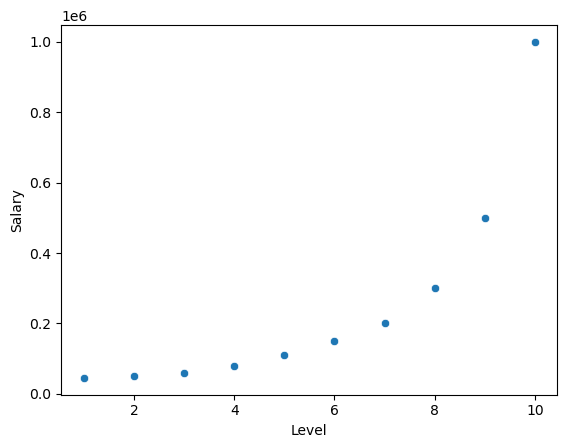

In [23]:
sns.scatterplot(data=dataset,x='Level',y='Salary')
plt.show()

### Build Model Withoud train test

In [3]:
x = dataset.iloc[:,1:-1]
y = dataset['Salary']

In [4]:
from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor()

In [5]:
decision_tree.fit(x,y)

DecisionTreeRegressor()

In [6]:
predictions=decision_tree.predict(x)

In [7]:
decision_tree.score(x,y)*100

100.0

In [8]:
decision_tree.predict([[5]])

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([110000.])

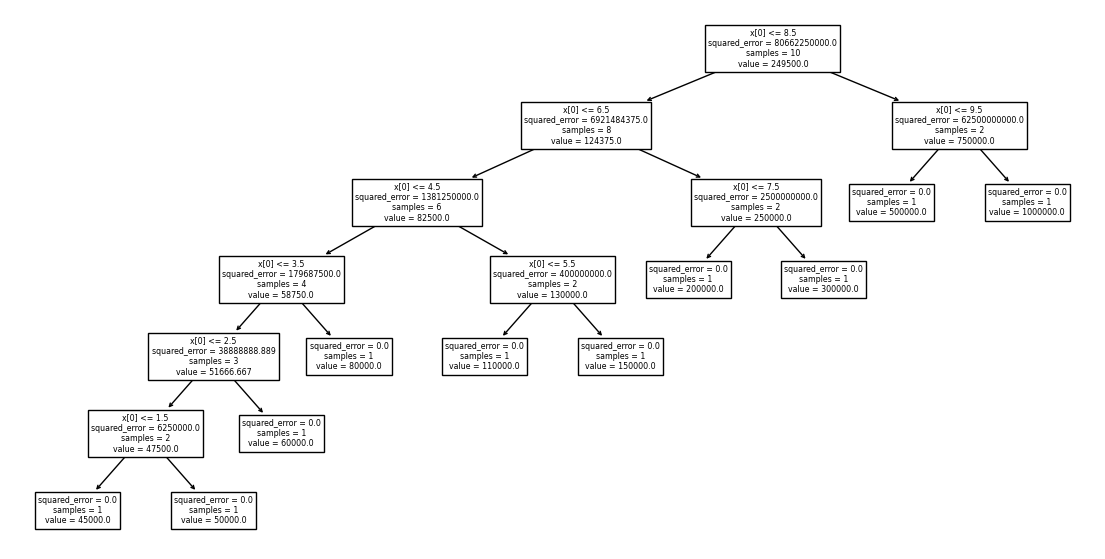

In [9]:
from sklearn import tree

plt.figure(figsize=(14,7)) 
tree.plot_tree(decision_tree)
plt.show() 

### Build Model with train test

In [54]:
x = dataset.iloc[:,1:-1]
y = dataset[['Salary']]

In [31]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree=2)

In [32]:
x = pf.fit_transform(x)

In [55]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()

In [56]:
x = sc_x.fit_transform(x)
y = sc_y.fit_transform(y)

In [57]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.2,random_state=101)

In [58]:
from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor(max_depth=3)

In [59]:
decision_tree.fit(X_train,Y_train)

DecisionTreeRegressor(max_depth=3)

In [60]:
predictions=decision_tree.predict(X_test)

In [61]:
decision_tree.score(X_train,Y_train)*100  

99.78562920625386

In [62]:
decision_tree.score(X_test,Y_test)*100 

-158.26733241505968

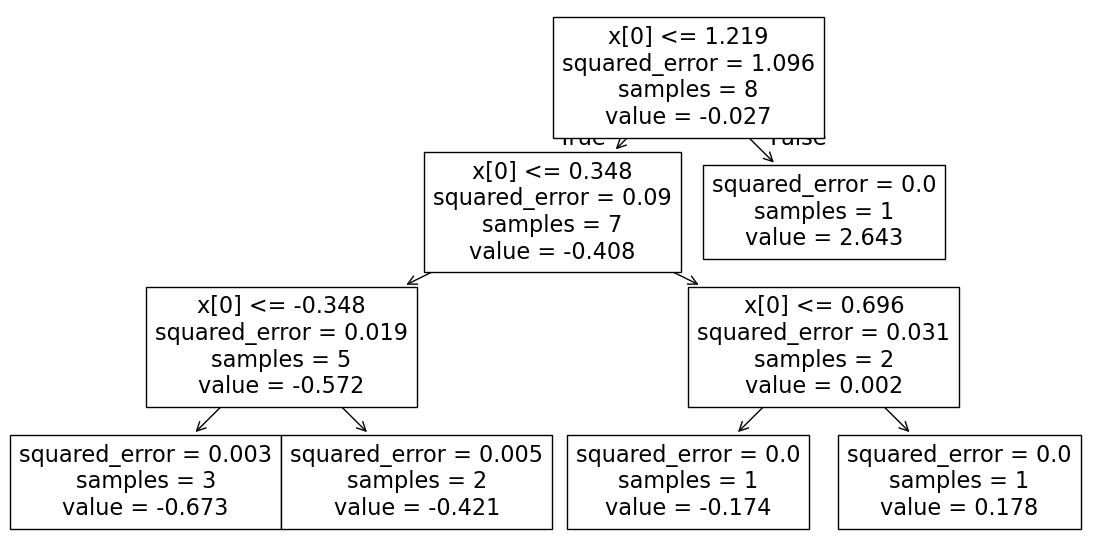

In [63]:
from sklearn import tree

plt.figure(figsize=(14,7)) 
tree.plot_tree(decision_tree)
plt.show() 

In [64]:
# To check value of max-depth
for i in range(1,10):
    dtr1 = DecisionTreeRegressor(max_depth=i)
    dtr1.fit(X_train,Y_train) 
    print(i,dtr1.score(X_train,Y_train), dtr1.score(X_test,Y_test))

1 0.9284297696923194 -1.6385615196491816
2 0.982077659353619 -1.5901756198347106
3 0.9978562920625386 -1.5826733241505968
4 0.9999823320774385 -1.5867768595041323
5 1.0 -1.5867768595041323
6 1.0 -1.5867768595041323
7 1.0 -1.5867768595041323
8 1.0 -1.5867768595041323
9 1.0 -1.5867768595041323
